In [1]:
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config = config)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.utils.np_utils import to_categorical
import keras
import time
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import shutil
tStart = time.time()
print(os.getpid())
from sklearn.model_selection import train_test_split

/home/tsai/anaconda3/envs/tensorflow/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


14510


In [2]:
def Model2(config):
    filt_size = (3, 3)
    model2 = Sequential()
    model2.add(Convolution2D(32, filt_size, input_shape=config.dim, activation='relu', padding='same'))
    print(config.dim)
    model2.add(Convolution2D(32, filt_size, activation='relu', padding='same'))
    model2.add(BatchNormalization())
    model2.add(MaxPooling2D((2,2)))
    model2.add(Dropout(0.5))
    
    model2.add(Convolution2D(64, filt_size, activation='relu', padding='same'))
    model2.add(Convolution2D(64, filt_size, activation='relu', padding='same'))
    model2.add(BatchNormalization())
    model2.add(MaxPooling2D((2,2)))
    model2.add(Dropout(0.5))
    
    model2.add(Convolution2D(128, filt_size, activation='relu', padding='same'))
    model2.add(Convolution2D(128, filt_size, activation='relu', padding='same'))
    #model2.add(Convolution2D(128, filt_size, activation='relu', padding='same'))
    model2.add(BatchNormalization())
    model2.add(MaxPooling2D((2,2)))
    model2.add(Dropout(0.5))
    
    model2.add(Convolution2D(256, filt_size, activation='relu', padding='same'))
    #model2.add(Convolution2D(256, filt_size, activation='relu', padding='same'))
    #model2.add(Convolution2D(256, filt_size, activation='relu', padding='same'))
    model2.add(BatchNormalization())
    model2.add(MaxPooling2D((2,2)))
    model2.add(Dropout(0.5))
    
    
    model2.add(Flatten())
    model2.add(Dense(128, activation='relu'))
    model2.add(BatchNormalization())
    model2.add(Dropout(0.5))
    model2.add(Dense(96, activation='relu'))
    model2.add(BatchNormalization())
    model2.add(Dropout(0.5))
    model2.add(Dense(1))
    model2.add(Activation('linear'))
    
    opt = optimizers.Adam(config.learning_rate)

    model2.compile(optimizer=opt, loss=keras.losses.mean_squared_error, metrics=['mae'])
    return model2

def _shuffle(X, Y):
    randomize = np.arange(len(X))
    np.random.shuffle(randomize)

    return (X[randomize], Y[randomize])

def __shuffle(X):
    randomize = np.arange(len(X))
    np.random.shuffle(randomize)

    return X[randomize]

def split_valid_set(X_all, Y_all, percentage):
    all_data_size = len(X_all)
    valid_data_size = int(math.floor(all_data_size * percentage))

    #X_all, Y_all = _shuffle(X_all, Y_all)

    X_train, Y_train = X_all[0:valid_data_size], Y_all[0:valid_data_size]
    X_valid, Y_valid = X_all[valid_data_size:], Y_all[valid_data_size:]

    return X_train, Y_train, X_valid, Y_valid


def split_valid_index(total_len, percentage):
    all_data_size = total_len
    valid_data_size = int(math.floor(all_data_size * percentage))

    x = np.arange(total_len)
    x_all = __shuffle(x)

    return x_all[0:valid_data_size], x_all[valid_data_size:]

In [3]:
def Parse_Data():
    path = './data/feat.csv'
    df = pd.read_pickle(path)
    Y_train = df['corr']
    #data = df.drop('corr', axis =1 )
    data = df.feat
    print(np.shape(data))
    X_train = data


    print(np.shape(X_train))
    print(np.shape(Y_train))
    
    return X_train, Y_train



In [4]:
X, Y = Parse_Data()

(150000,)
(150000,)
(150000,)


In [5]:
X = X/255

In [7]:
newX = np.zeros((np.shape(X)[0], np.shape(X[0])[0],  np.shape(X[0])[1], 3))
print(np.shape(newX))

(150000, 75, 75, 3)


In [8]:
for i in range(np.shape(X)[0]):
    newX[i, :, :, :] = X[i]

In [9]:
#X_train = newX
#y_train = Y
X_train, y_train, X_test, y_test = split_valid_set(newX, Y, 0.33)
# mem error if shuffle
#X_train, X_test, y_train, y_test = train_test_split(newX, Y, test_size=0.33, random_state=42, shuffle=False)

In [10]:
print(np.shape(y_train))

(49500,)


In [11]:
from keras.utils import Sequence, to_categorical
from keras import backend as K

In [12]:
class Config(object):
    def __init__(self, learning_rate=0.001, max_epochs=50, dim = (75, 75, 3), n_folds = 5):
    
       
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs
        self.dim = dim
        self.n_folds = n_folds

In [13]:
config = Config(learning_rate=0.001,  dim = (75, 75, 3))

In [14]:
# In[3]:

from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D,BatchNormalization, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import StratifiedKFold

from keras.callbacks import (EarlyStopping, LearningRateScheduler,
                             ModelCheckpoint, TensorBoard, ReduceLROnPlateau)



In [15]:
PREDICTION_FOLDER = "resize_img_only"
if not os.path.exists(PREDICTION_FOLDER):
    os.mkdir(PREDICTION_FOLDER)
if os.path.exists('logs/' + PREDICTION_FOLDER):
    shutil.rmtree('logs/' + PREDICTION_FOLDER)

In [16]:

checkpoint = ModelCheckpoint(PREDICTION_FOLDER + '/best.h5', monitor='val_loss', verbose=1, save_best_only=True)
early = EarlyStopping(monitor="val_loss", mode="min", patience=10)
tb = TensorBoard(log_dir='./logs/' + PREDICTION_FOLDER, write_graph=True)

callbacks_list = [checkpoint, early, tb]

model = Model2(config)
model.summary()

history =  model.fit(X_train, y_train, batch_size = 256, validation_split = 0.25, epochs = 100, verbose = 1, callbacks=callbacks_list)



(75, 75, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 75, 75, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 75, 75, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 37, 37, 64)        36928    


Epoch 00016: val_loss improved from 0.04648 to 0.03677, saving model to resize_img_onlybest.h5
Epoch 17/100
37125/37125 [==============================] - 30s 819us/step - loss: 0.0135 - mean_absolute_error: 0.0908 - val_loss: 0.0442 - val_mean_absolute_error: 0.1750

Epoch 00017: val_loss did not improve from 0.03677
Epoch 18/100
37125/37125 [==============================] - 30s 819us/step - loss: 0.0135 - mean_absolute_error: 0.0902 - val_loss: 0.0330 - val_mean_absolute_error: 0.1488

Epoch 00018: val_loss improved from 0.03677 to 0.03300, saving model to resize_img_onlybest.h5
Epoch 19/100
37125/37125 [==============================] - 30s 820us/step - loss: 0.0135 - mean_absolute_error: 0.0905 - val_loss: 0.0272 - val_mean_absolute_error: 0.1348

Epoch 00019: val_loss improved from 0.03300 to 0.02722, saving model to resize_img_onlybest.h5
Epoch 20/100
37125/37125 [==============================] - 31s 822us/step - loss: 0.0133 - mean_absolute_error: 0.0896 - val_loss: 0.0267 - 

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 75, 75, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 75, 75, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 37, 37, 64)        36928     
__________

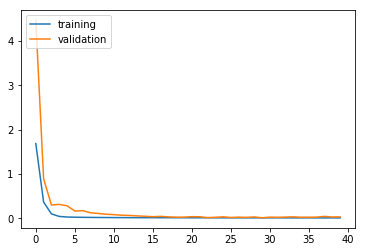

100500/100500 [==============================] - 40s 397us/step


In [18]:

model.load_weights(PREDICTION_FOLDER + '/best.h5')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

results = model.evaluate(X_test, y_test)




In [19]:
print('Test loss: ', results[0])

Test loss:  0.012382846880611496
